ENSO Effect on Global Average Temperature

Purpose:
Export a file with zero temporal average effect for correcting annual global average temperature estimates for assumed intrinsic variability of the El Nino Southern Oscillation (ENSO) from 1871 using the approach of Lean and Rind [2008] with ENSO data extended through 2018 from https://ggweather.com/enso/oni.htm. For the 1871-2005 MEI index, "All values are normalized for each bimonthly season so that the 135 values from1871 to 2005 have an average of zero and a standard deviation of "1". " For the 1950-2018 MEI indexAll values are normalized for each bimonthly
season so that the 44 values from 1950 to 1993 have an average of zero and a standard deviation of "1". These notes suggest that the original input has in each case been subjected to a linear transformation to get the reported data, and thus a linear relationship between the earlier and later data sets.

References
Lean, J. L.,  and D. H. Rind, 2008: How natural and anthropogenic influences alter global average temperatures: 1889 to 2006. Geophys. Res. Lett. 35, L18701, doe: 10.1029/2008GL034864.
Wolter, K., and M. Timlin, 2001: El Nino Southern Oscillation behaviour since 1871 as diagnosed in an extended multivariate ENSO index (MEI.ext), Int. J. Climatol. 31, 1074-1087, doi: 10.1002/joc.2336.
Wolter, K., 2011: MEI.ext Index (created:  10 May 2011), https://www.esrl.noaa.gov/psd/enso/mei.ext/table.ext.html, accessed 19 December 2018.
Wolter, K., 2018. MEI Index (updated:  7 December 2018), https://www.esrl.noaa.gov/psd/enso/mei/table.html, accessed 19 December 2018.

In [13]:
%reset -f
import os,sys
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.image as mpimg
os.chdir('C:\\Users\\cd7\\Desktop\\Ocean\\Jul3ENSO')

In [2]:
out1 = 'enso';
out2 = 'effect';
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-')
yrs = str(int(date_split[0])-2000)
seq = [out1, yrs, months[int(date_split[1])-1],date_split[2],out2]
seperator = ','
filename = seperator.join(seq).replace(',', '')
filename

'enso19jul07effect'

In [3]:
df1 = pd.read_excel('cage18enso1871-2005mei19dec.xlsx')
df1.to_csv('cage19enso1871-2005mei19dec.csv',index=False)
df1 = pd.read_csv('cage19enso1871-2005mei19dec.csv')
df1.drop(df1.index[[-1]],inplace=True)

df2 = pd.read_excel('cage18ensomei1950-2018wolter19dec.xlsx')
df2.to_csv('cage19ensomei1950-2018wolter19dec.csv',index=False)
df2 = pd.read_csv('cage19ensomei1950-2018wolter19dec.csv')
df2.drop(df2.index[[-1]],inplace=True)

Import Lean and Rind figure with left vertical axis in Degree K and right vertical axis presumably in the same MEI units and the second Wolter reference.

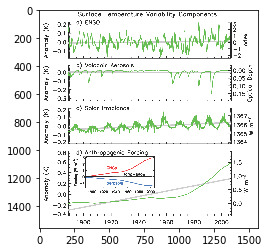

In [16]:
img=mpimg.imread('lean18fig1dec17.png')
imgplot = plt.imshow(img)

Extract the data as a list (for years) of lists of bimonthlies mei1 and mei2, and lists of all of the years for each.

In [5]:
yrs1all = df1.iloc[:,0]
yrs1all = list(map(int,yrs1all.tolist()))
mei1 = df1.iloc[:,0:]

yrs2all = df2.iloc[:,0]
yrs2all = list(map(int,yrs2all.tolist()))
mei1list = []
for i in range(0,len(yrs1all)):
    monthlymei1 = list(map(float,mei1.iloc[i,1:].tolist()))
    mei1list.append(monthlymei1)

mei2 = df2.iloc[:,0:]
mei2list = []
for i in range(0,len(yrs2all)):
    monthlymei2 = list(map(float,mei2.iloc[i,1:].tolist()))
    mei2list.append(monthlymei2)

Collapse lists of lists into single lists

In [6]:
mei1flat_list = [item for sublist in mei1list for item in sublist]

mei2flat_list = [item for sublist in mei2list for item in sublist]

Find the least squares linear relationship for the newer MEI data as a function of the older MEI data

In [7]:
yrsboth = list(set(yrs1all) & set(yrs2all))
mei1bothflat = mei1list[yrsboth[1] - yrs1all[1]:]
mei1bothflat_list = [item for sublist in mei1bothflat for item in sublist]

mei2bothflat = mei2list[:-(yrs2all[-1] -yrsboth[-1])]
mei2bothflat_list = [item for sublist in mei2bothflat for item in sublist]
fit1 = np.polyfit(mei2bothflat_list,mei1bothflat_list, 1)

Express the old MEI data from before the new MEI data in the new MEI units and join 

In [8]:
mei1early =mei1list[:-(1+yrs1all[-1] - yrsboth[0])]
mei1earlyflat_list = [item for sublist in mei1early for item in sublist]
mei1fit = np.polyval(fit1,mei1earlyflat_list).tolist()
meijoin = mei1fit + mei2flat_list

Average the bimonthly data ending in October through the bimonthly data ending in September of the next year to approximate the annual for that next year assuming a four month delay per Lean between ENSO and its effect on global average temperature, to center the average on March 1, which is nshift=4 months before July 1, which is approximately mid-year. The first year for the averaged results is thus the year after the first year in the old MEI data set.

Text(0,0.5,'MEI')

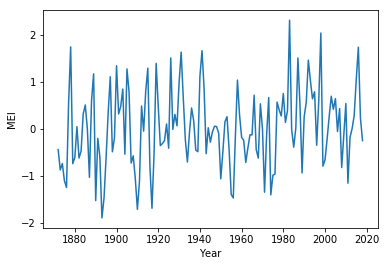

In [9]:
nshift = 4
nlast = 12 - nshift
nav = len(meijoin)/12 - 1
nav
meiav = []
for i in range(0,int(nav)):
    mean = np.mean(meijoin[(12*i  + nlast): (12*(i+1) + nlast)])
    meiav.append(mean)

yrsav = list(set(yrs1all).union(yrs2all))[1:]

plt.plot(yrsav,meiav)
plt.xlabel('Year')
plt.ylabel('MEI')

Using measurements previously extracted leanfig1, convert MEI index values to temperature differences

Text(0,0.5,'$^\\circ$K(ENSO)')

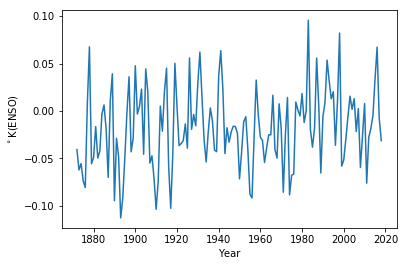

In [10]:
dyleft = 349.1 - 303.5
dyright = 351.3 - 296
dk = 0.2 - (-0.1)
dindex = 3 - (-2)
doffsetright = 319.7 - 318.1
doffset1 = 329.2 - 318.1
ratio = doffsetright/doffset1
offset = 0.01 + (dk/dindex)*ratio*1
rescale = (dk/dindex) * (dyleft/dyright)
dtemp = rescale * np.asarray(meiav) - offset
plt.plot(yrsav,dtemp)
plt.xlabel('Year')
plt.ylabel('$^\circ$K(ENSO)')

Subtract out a linear fit to the temperature differences in order to find corrected differences that have a zero mean.

Text(0,0.5,'$^\\circ$K(ENSO)')

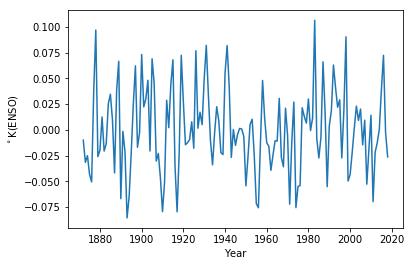

In [11]:
degfit = np.polyfit(yrsav,dtemp, 1)
ensofit = np.polyval(degfit,yrsav).tolist()

fixtemp = dtemp - ensofit
plt.plot(yrsav,fixtemp)
plt.xlabel('Year')
plt.ylabel('$^\circ$K(ENSO)')

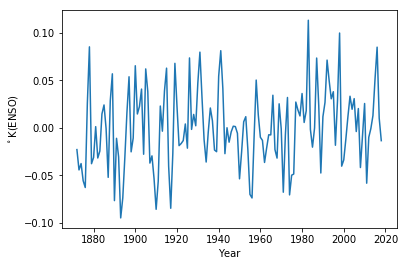

In [12]:
dtempzeroav = dtemp - np.mean(dtemp)
plt.plot(yrsav,dtempzeroav)
plt.xlabel('Year')
plt.ylabel('$^\circ$K(ENSO)')

yrsav = list(map(str, yrsav))
yrsav = pd.DataFrame({'Year':yrsav})
dtempzeroav = list(map(str, dtempzeroav))
dtempzeroav = pd.DataFrame({'deg K':dtempzeroav})
ensotable = pd.merge(yrsav,dtempzeroav, left_index =True, right_index =True,how='outer')
ensotable = ensotable.astype(float)

ensotable.loc[-1]=['ENSO','Global Effect']
ensotable.index = ensotable.index+1 
ensotable = ensotable.sort_index()
ensotable.loc[(len(ensotable))] = ['Wolter/Lean','cage18enso21dec.nb']
ensotable.to_csv(filename + '.csv', index=False, encoding='utf-8')